In [58]:
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch 
from torchmetrics import F1Score
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torchvision.transforms import Resize
import helper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import os
from torch.utils.data import RandomSampler, DataLoader, Subset, SubsetRandomSampler, RandomSampler


from Net import *
from Model import *
from PlanktonLoader import *
from Plot import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of Model failed: Traceback (most recent call last):
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/nounou/mambaforge/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, nam

In [59]:
# pre-processing
data_folder = '../ZooScanSet'
saving_location = '../Saving_Output/'
# data_folder = '/Users/nounou/Desktop/EPFL/M5/Project I/Code/ZooScanSet'
image_size = (128,128)
normalize = ((0.5), (0.5))
unwanted_classes = ['seaweed','badfocus__Copepoda','artefact','badfocus__artefact','bubble','detritus','fiber__detritus','egg__other','multiple__other']
transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(), transforms.Normalize(*normalize)])

dataset = PlanktonLoader(data_folder+'/taxa.csv', data_folder+"/imgs/", unwanted_classes ,transform)

#sampling and train-test split
sampling_factor = .01
train_factor = .8
shuffle = True
random_seed= 42
batch_size = 16

trainloader_dataset, testloader_dataset = PlanktonLoader.build_loaders(dataset, sampling_factor, train_factor, batch_size, random_seed= 41, shuffle_dataset= True)


 The id list has a lenght of  703821
oops identation broken, the following differs between the list of directories and the class list
[]
['.DS_Store']
We have  84 classes
We use  0.01 of the data ( 7038 samples) and the train factor is  0.8
Train set contains 5630 images.
Test set contains 1408 images.


In [60]:
num_epochs = 8
lr = 0.001
opt_func = torch.optim.Adam
crit = F.cross_entropy
net = Net()
model = ImageClassificationBase(opt_func,crit,net,lr, num_epochs)

history = model.fit(trainloader_dataset, testloader_dataset)


Epoch [0], train_loss: 2.5048, val_loss: 2.1952, val_acc: 0.4411,  val_f1_score: 0.4411
Epoch [1], train_loss: 1.9199, val_loss: 2.0459, val_acc: 0.4524,  val_f1_score: 0.4524
Epoch [2], train_loss: 1.6096, val_loss: 2.0233, val_acc: 0.4702,  val_f1_score: 0.4702
Epoch [3], train_loss: 1.3109, val_loss: 2.1739, val_acc: 0.4560,  val_f1_score: 0.4560
Epoch [4], train_loss: 1.0455, val_loss: 2.2966, val_acc: 0.4581,  val_f1_score: 0.4581
Epoch [5], train_loss: 0.8432, val_loss: 2.5292, val_acc: 0.4879,  val_f1_score: 0.4879
Epoch [6], train_loss: 0.6796, val_loss: 2.6065, val_acc: 0.4766,  val_f1_score: 0.4766
Epoch [7], train_loss: 0.5566, val_loss: 2.8400, val_acc: 0.4631,  val_f1_score: 0.4631


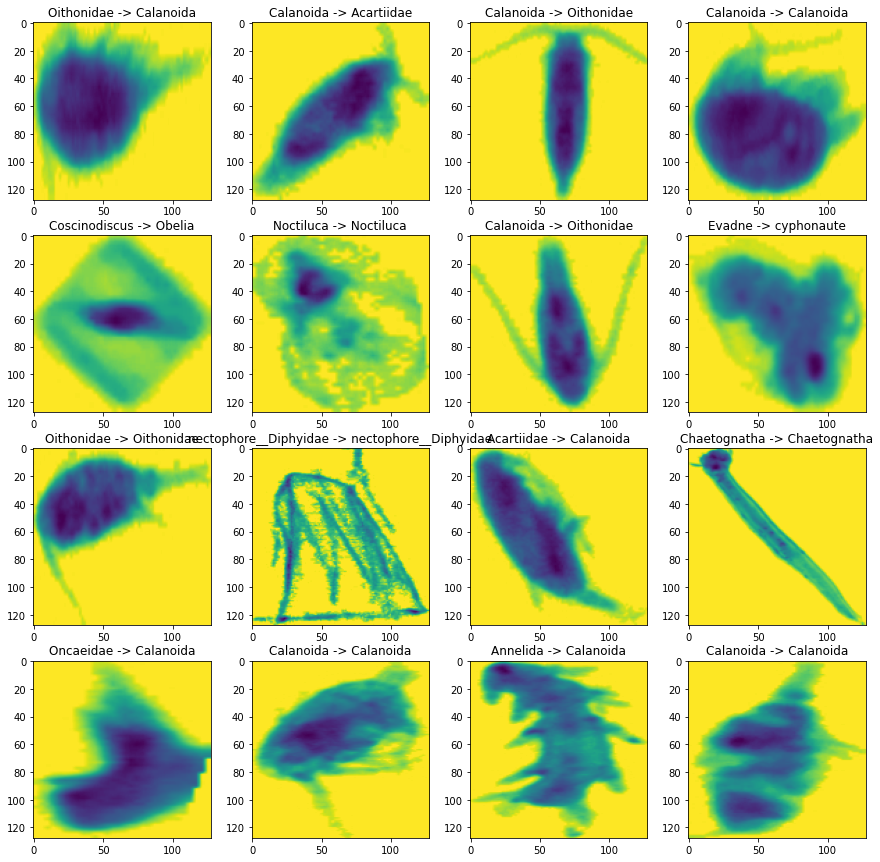

7 good predictions. Accuracy :  0.4375


In [61]:
torch.save(net.state_dict(), saving_location+'/last_model.pth')
Plot.plot_random_output(testloader_dataset, dataset, net, saving_location+'random_preds.png')


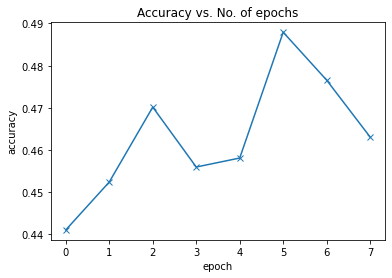

In [62]:
Plot.plot_accuracies(history, saving_location+'accuracy(e).png')

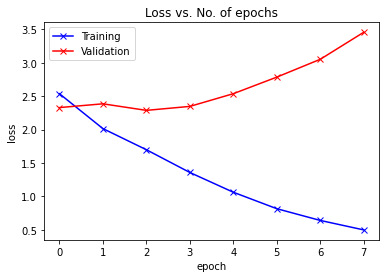

In [23]:
Plot.plot_losses(history, saving_location+'losses.png')


In [26]:
df = Plot.class_accuracies(Plot, net, dataset, testloader_dataset, saving_location+'class_acc.csv')


Class # 0   Neoceratium trained on 32 times -> accuracy : 0.34375
Class # 1   Noctiluca trained on 192 times -> accuracy : 0.5520833333333334
Class # 2   Phaeodaria trained on 560 times -> accuracy : 0.4857142857142857
Class # 3   Acantharea was never trained on
Class # 4   Foraminifera trained on 256 times -> accuracy : 0.46875
Class # 5   Spumellaria was never trained on
Class # 6   Coscinodiscus trained on 368 times -> accuracy : 0.48097826086956524
Class # 7   Annelida trained on 16 times -> accuracy : 0.5625
Class # 8   larvae__Annelida was never trained on
Class # 9   Tomopteridae was never trained on
Class # 10   Evadne trained on 512 times -> accuracy : 0.4765625
Class # 11   Podon trained on 16 times -> accuracy : 0.375
Class # 12   Penilia trained on 272 times -> accuracy : 0.5036764705882353
Class # 13   larvae__Crustacea was never trained on
Class # 14   Gammaridea was never trained on
Class # 15   Hyperiidea trained on 48 times -> accuracy : 0.3958333333333333
Class # 16  